# Best Books Ever

#### Audiencia y motivacion

Como un acérrimo lector siempre me encuentro en la busqueda de nuevos titulos para leer y recomendando a amigos y conocidos sus posibles nuevas lecturas. 
En ambos casos es comun que se presente la misma problematica: es muy dificil poder dar con lo que busco, generalmente por falta de conocimiento sobre nuevos lanzamientos o libros no tan nuevos pero que fueron escritos por autores que aún no tuve la oportunidad de conocer. Por esto, apenas descubri el dataset con el que estoy trabajando se me ocurrio hacer un sistema de recomendacion de libros basado en las puntuaciones que un usuario le ponga a titulos que ya leyó.

---

#### Descripcion

Best Books Ever es un data set extraido de la pagina GoodReads en donde los usuarios (entre otras cosas) pueden calificar los libros que hayan leido, este dataset recopila todas las puntuaciones para cada libro ademas de agregar informacion de los mismos como el genero al que pertenecen, la fecha de publicacion o el formato en el que fue publicado el libro.
Las columnas con las que cuento son:


| Columna | Descripcion |
| -------------- | ------------- |
| bookId | ID del libro como en goodreads.com |
| title | Titulo |
| author | Autor/a |
| rating | Calificacion global en goodreads |
| language | Idioma |
| genres | Lista de generos | 
| bookFormat | Tipo de encuadernado |
| pages | Cantidad de paginas |
| publishDate | Fecha de publicacion |
| firstPublishDate | Fecha de publicacion de la primer edicion |
| numRatings | Cantidad de calificaciones |
| likedPercent | Porcentaje de calificaciones mayores a dos estrellas |
| price | Precio |
| publishDecade | Decada de publicacion |
| weightedRating | Rating aplicando shrinkage estimation |


---

#### Preguntas problema

- ¿Cuales son los autores, generos y formatos mas populares?
- ¿Cuales son los libros mas vendidos?
- ¿Cual es la distribucion de precios?¿y la de cantidad de paginas?
- ¿Cuales son los libros mejor calificados?
- ¿Fue cambiando esto con el tiempo?
- ¿Que relaciones hay entre las variables?

---

### Set Up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('BestBooksDS.csv', index_col=0)

In [110]:
df.head(3)

,bookId,title,author,rating,language,genres,bookFormat,pages,publishDate,firstPublishDate,numRatings,likedPercent,price,publishDecade,weightedRating
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",hardcover,374,2008-09-14,NaN,6376780,96.0,5.09,2000,4.329518
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",paperback,870,2004-09-28,2003-06-21,2507623,98.0,7.38,2000,4.498101
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,English,"['Classics', 'Fiction', 'Historical Fiction', ...",paperback,324,2006-05-23,2060-07-11,4501075,95.0,5.62,2000,4.279428


In [4]:
df.publishDate = pd.to_datetime(df.publishDate, errors='coerce')
df.firstPublishDate = pd.to_datetime(df.firstPublishDate, errors='coerce')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52429 entries, 0 to 52477
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookId            52429 non-null  object        
 1   title             52429 non-null  object        
 2   author            52429 non-null  object        
 3   rating            52429 non-null  float64       
 4   language          52429 non-null  object        
 5   genres            52429 non-null  object        
 6   bookFormat        52429 non-null  object        
 7   pages             52429 non-null  int64         
 8   publishDate       50645 non-null  datetime64[ns]
 9   firstPublishDate  31109 non-null  datetime64[ns]
 10  numRatings        52429 non-null  int64         
 11  likedPercent      52429 non-null  float64       
 12  price             52429 non-null  float64       
 13  publishDecade     52429 non-null  int64         
 14  weightedRating    5242

---

### Metadata

In [113]:
import ast
import itertools

#Cuento la cantidad de autores y formatos
num_autores = df.author.value_counts()
num_formatos = df.bookFormat.value_counts()
num_idiomas = df.language.value_counts()

#Como cada libro tiene una lista de generos, los concateno todos en una sola lista
#Luego, puedo utilizar esta lista para visualizar la popularidad de los mismos.
genres = list()
for i in range(len(df)):

    lista = ast.literal_eval(df.iloc[i]['genres'])
    genres.append(lista)

genres = pd.Series(itertools.chain.from_iterable(genres))

In [114]:
print(f'El dataframe tiene un largo de {len(df)} filas y un total de {len(df.columns)} columnas.')
print(f'Hay {len(num_autores)} autores.')
print(f'Hay {len(num_formatos)} formatos distintos.')
print(f'Hay {len(genres.value_counts())} generos distintos.')
print(f'Hay libros publicados en {len(num_idiomas)} idiomas distintos')

El dataframe tiene un largo de 52429 filas y un total de 15 columnas.
Hay 28227 autores.
Hay 121 formatos distintos.
Hay 982 generos distintos.
Hay libros publicados en 81 idiomas distintos


---

### Analizando los datos

##### ¿Cuales son los autores mas populares?

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\2201939519.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  autores_populares = df.groupby('author').sum().nlargest(5, columns='numRatings')


Text(0.5, 1.0, 'Autores populares segun la cantidad de ratings de sus libros')

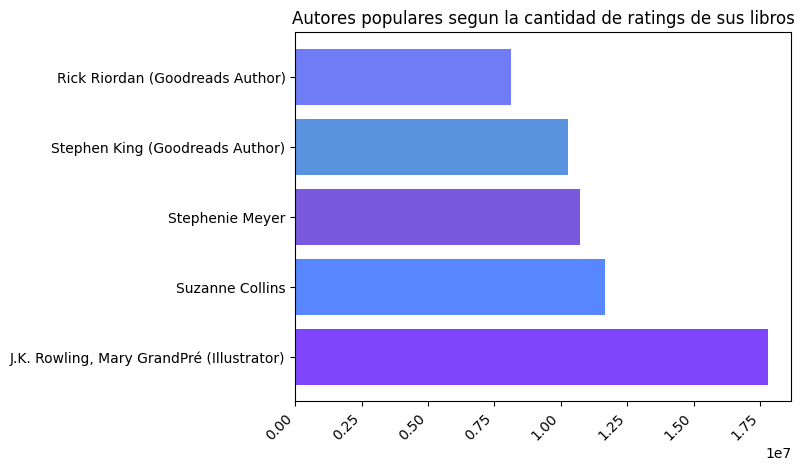

In [115]:
#Autores populares
#agrupo el dataframe por autor y sumo la cantidad de votos que tienen sus libros
autores_populares = df.groupby('author').sum().nlargest(5, columns='numRatings')

plt.barh(y=autores_populares.index, width=autores_populares['numRatings'], color={'#7E45FA', '#7959DE', '#6F7CF5', '#5992DE', '#5786FF'})
plt.xticks(rotation=45, ha='right')
plt.title('Autores populares segun la cantidad de ratings de sus libros')

In [116]:
#Popularidad de autores en el tiempo
df.publishDate = pd.to_datetime(df.publishDate, errors='coerce')
#creo la columna decade (decada de publicacion) para usarla como filtro
df['decade'] = df.publishDate.dt.year // 10 * 10

grouped = df.groupby(['decade'])
autores_decada = pd.DataFrame()
#sumo la cantidad de votos de cada autor y selecciono el mas votado de cada decada
for name, group in grouped:
  autores_populares = group.groupby(['author']).agg({'numRatings': 'sum'}).sort_values(by='numRatings', ascending=False)
  autores_decada = autores_decada.append(autores_populares.head(1))

autores_decada['decade'] = [int(name) for name, group in grouped]
autores_decada[:-1]

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\4131860470.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\4131860470.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autores_decada = autores_decada.append(autores_populares.head(1))
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\4131860470.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autores_decada = autores_decada.append(autores_populares.head(1))
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\4131860470.py:11: FutureWarning: The frame.append method is deprecated and will be removed f

,numRatings,decade
author,,
"Mir Taqi Mir, William Carmichael Smyth, Esq. (Editor)",5,1820
Friedrich Nietzsche,1089,1870
"Nellie Bly, Karine Ribeiro (Translator)",12358,1880
Charles Reade,313,1890
L. Frank Baum,22247,1900
Jean Webster,46466,1910
Ernest Hemingway,377031,1920
"Jean-Paul Sartre, Lloyd Alexander (Translator), H.P. van den Aardweg (Translator), Hayden Carruth (Introduction)",86235,1930
"Walter Farley, Keith Ward (Illustrator)",69436,1940


Del gran total de autores que hay registrados en el dataset, los mas populares son unos pocos, concentrandose la mayoria de lectores en autores de literatura relativamente moderna o contemporanea. Ademas, se puede destacar que los autores con mas votaciones dentro de la lista de mas populares por decada son autores que tienen una o mas de sus obras adaptadas a otros formatos (generalmente el cine)

---

### ¿Cuales son los formatos mas populares?

Text(0.5, 1.0, 'Formatos populares por cantidad de libros publicados')

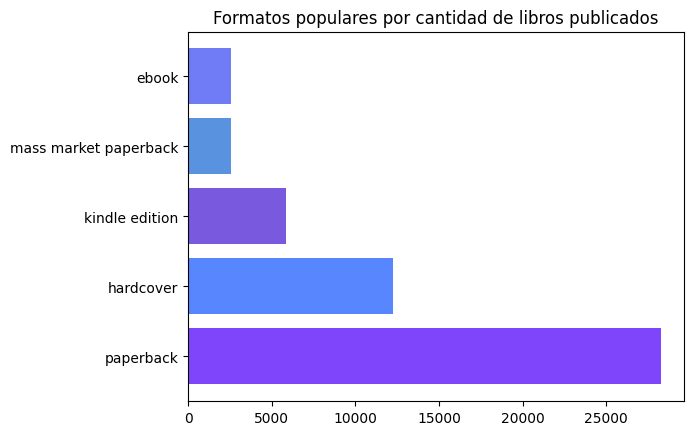

In [117]:
#Formatos populares
plt.barh(y=num_formatos[:5].index, width=num_formatos[:5].values, color={'#7E45FA', '#7959DE', '#6F7CF5', '#5992DE', '#5786FF'})
plt.title('Formatos populares por cantidad de libros publicados')

In [118]:
formatos_decada = pd.DataFrame()
formatos = list()
for name, group in grouped:
  top_formato = group['bookFormat'].value_counts().index[0]
  formatos.append(top_formato)

formatos_decada['Format'] = [i for i in formatos]
formatos_decada['decade'] = [int(name) for name, group in grouped]
formatos_decada[:-1]

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\1064500027.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\1064500027.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  formatos_decada['decade'] = [int(name) for name, group in grouped]


,Format,decade
0,paperback,1820
1,paperback,1870
2,kindle edition,1880
3,hardcover,1890
4,paperback,1900
5,hardcover,1910
6,paperback,1920
7,hardcover,1930
8,hardcover,1940
9,hardcover,1950


Como era de esperar, los formatos mas populares son paperback (tapa blanda) con mas del 50% de los libros publicados en este formato y hardcover (tapa dura) con menos de la mitad de libros que el formato anterior, constituyendo entre ambos los formatos de mas del 75% de los libros publicados.

Tambien, podemos ver que para las decadas 1880 y 2020 el formato mas popular es kindle. Este es utilizado para leer desde dispositivos moviles y E-Books (dispositivos de tinta electronica pensados especificamente para leer). En el caso de la decada 2020 se puede deber al auge de la utilizacion de este tipo de dispositivos a la hora de leer, pero en el caso de 1880 es debido al relanzamiento en formato digital de grandes obras clasicas.

---

### ¿Cuales son los generos mas populares?

Text(0.5, 1.0, 'Generos populares segun cantidad de libros pertenecientes a cada genero')

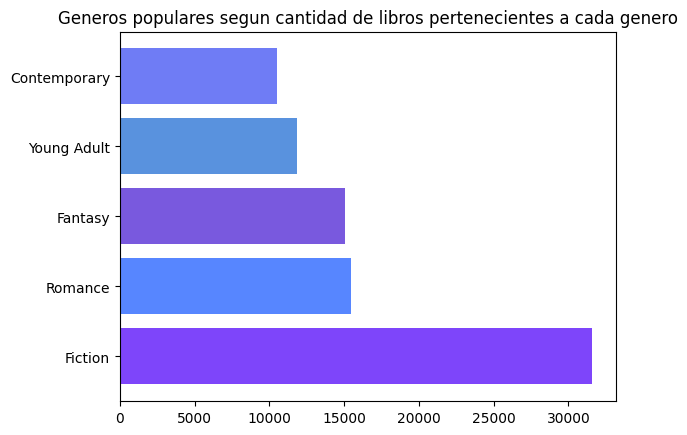

In [119]:
generos_populares = genres.value_counts()

plt.barh(y=generos_populares[:5].index, width=generos_populares[:5].values, color={'#7E45FA', '#7959DE', '#6F7CF5', '#5992DE', '#5786FF'})
plt.title('Generos populares segun cantidad de libros pertenecientes a cada genero')

In [120]:
first = pd.DataFrame()
for name, group in grouped:
    #busco los generos a los que pertenecen los libros mas populares
  generos_populares = group['genres'].value_counts().index.tolist()
  generos = list()

  for i in range(len(generos_populares)):
    lista = ast.literal_eval(group.iloc[i]['genres'])      
    generos.append(lista)
  generos = pd.Series(itertools.chain.from_iterable(generos))
  try:
    genero = generos.value_counts()[:1].index[0]
  except:
    genero = 'unknown'
  first = first.append({'genero': genero, 'decada': int(name)}, ignore_index=True)

first[:-1]

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\3506488005.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\3506488005.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first = first.append({'genero': genero, 'decada': int(name)}, ignore_index=True)
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\3506488005.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first = first.append({'genero': genero, 'decada': int(name)}, ignore_index=True)
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\3506488005.py:15: FutureWarning: The frame.append method is de

,genero,decada
0,unknown,1820
1,Philosophy,1870
2,Classics,1880
3,Historical Fiction,1890
4,Fiction,1900
5,Classics,1910
6,Classics,1920
7,Fiction,1930
8,Fiction,1940
9,Fiction,1950


En el caso de los generos mas populares, se corresponden claramente con los autores mas populares para cada decada, y  el top de generos mas populares de todos los tiempos se corresponde con los libros mas vendidos. Es notorio destacar que aproximadamente el 60% de libros registrados en el dataset pertenecen al genero ficcion, siendo este el genero mas popular de 11 de las 17 decadas abarcadas en este grupo de datos.

---

### ¿Cuales son los libros mas vendidos?

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\820910797.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_sellers = df.groupby('title').sum().nlargest(5, columns='numRatings')


Text(0.5, 1.0, 'Best sellers segun cantidad de votos')

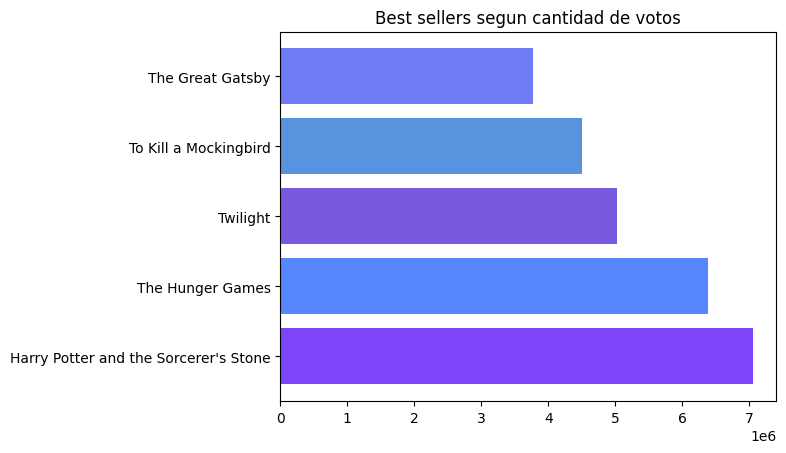

In [121]:
#agrupo por titulo ya que puede haber un mismo libro en distinto formato/idioma
best_sellers = df.groupby('title').sum().nlargest(5, columns='numRatings')

plt.barh(y=best_sellers.index, width=best_sellers['numRatings'], color={'#7E45FA', '#7959DE', '#6F7CF5', '#5992DE', '#5786FF'})
plt.title('Best sellers segun cantidad de votos')

In [122]:
#libro mas vendido de cada decada
libros_decada = pd.DataFrame()

for name, group in grouped:
  libros_decada = libros_decada.append(group.nlargest(1, 'numRatings')[['title', 'author', 'numRatings', 'decade']])

libros_decada['decade'] = libros_decada['decade'].astype(int)
libros_decada[:-1]

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\977330085.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\977330085.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  libros_decada = libros_decada.append(group.nlargest(1, 'numRatings')[['title', 'author', 'numRatings', 'decade']])
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704\977330085.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  libros_decada = libros_decada.append(group.nlargest(1, 'numRatings')[['title', 'author', 'numRatings', 'decade']])
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_1704

,title,author,numRatings,decade
34941,شعلۂ عشق,"Mir Taqi Mir, William Carmichael Smyth, Esq. (...",5,1820
22824,On Truth and Lies in a Nonmoral Sense,Friedrich Nietzsche,1089,1870
29827,Ten Days in a Mad-House,"Nellie Bly, Karine Ribeiro (Translator)",12358,1880
18937,The Cloister and the Hearth,Charles Reade,313,1890
9291,Ozma of Oz,L. Frank Baum,22247,1900
1666,Daddy-Long-Legs,Jean Webster,46466,1910
218,The Sun Also Rises,Ernest Hemingway,365874,1920
779,Nausea,"Jean-Paul Sartre, Lloyd Alexander (Translator)...",86235,1930
2216,The Black Stallion,"Walter Farley, Keith Ward (Illustrator)",69436,1940
421,A Streetcar Named Desire,Tennessee Williams,261257,1950


---

### ¿Cual es la distribucion de precios y paginas?

(array([5.1921e+04, 3.3900e+02, 1.0000e+02, 3.1000e+01, 1.8000e+01,
        8.0000e+00, 1.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([8.4000e-01, 9.0620e+01, 1.8040e+02, 2.7018e+02, 3.5996e+02,
        4.4974e+02, 5.3952e+02, 6.2930e+02, 7.1908e+02, 8.0886e+02,
        8.9864e+02]),
 <BarContainer object of 10 artists>)

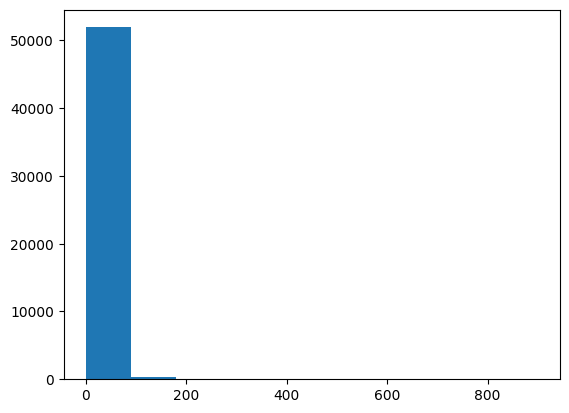

In [123]:
plt.hist(df.price)

Text(0.5, 1.0, 'Media de precios por decada')

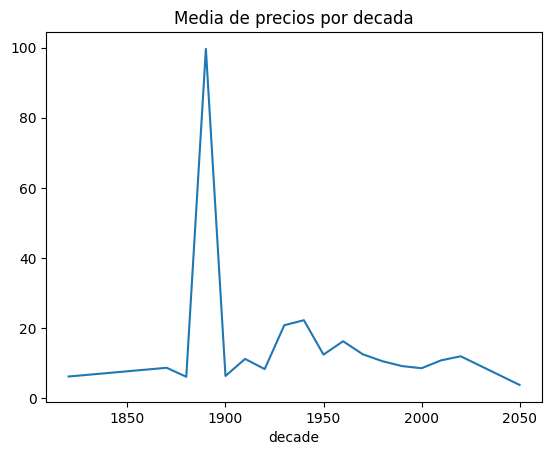

In [124]:
grouped.price.mean().plot()
plt.title('Media de precios por decada')

(array([5.2203e+04, 1.8100e+02, 2.5000e+01, 1.1000e+01, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  1477.7,  2955.4,  4433.1,  5910.8,  7388.5,  8866.2,
        10343.9, 11821.6, 13299.3, 14777. ]),
 <BarContainer object of 10 artists>)

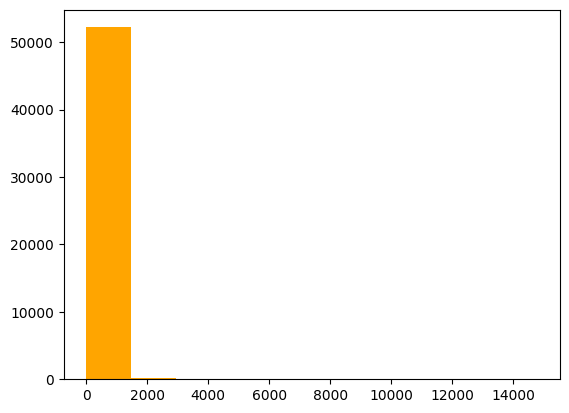

In [125]:
plt.hist(df.pages, color='orange')

Text(0.5, 1.0, 'Media de paginas por decada')

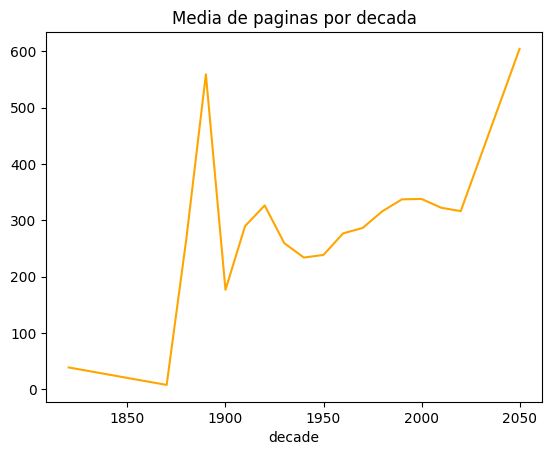

In [126]:
grouped.pages.mean().plot(color='orange')
plt.title('Media de paginas por decada')

Text(0.5, 1.0, 'Comparacion de la media de Precios y Paginas en el tiempo')

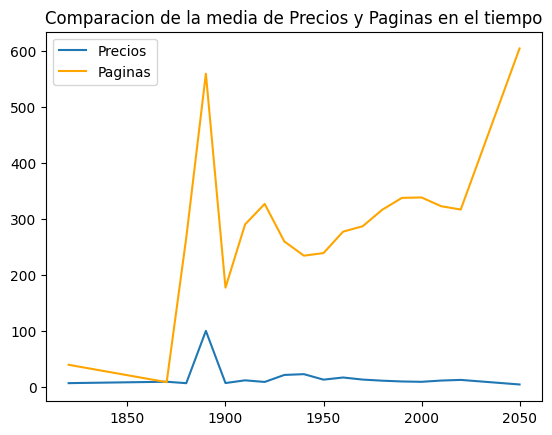

In [127]:
fig, ax = plt.subplots()
ax.plot(grouped.price.mean(), label='Precios')
ax.plot(grouped.pages.mean(), label='Paginas', color='orange')
ax.legend()
plt.title('Comparacion de la media de Precios y Paginas en el tiempo')

Es interesante resaltar como las distribuciones de cantidad de paginas y de precios estan totalmente sesgadas a la derecha, cosa que es totalmente esperable ya que los rangos de precios y paginas de los libros no suelen variar mucho y son cantidades bajas en excepcion de las ediciones especiales y los box-set.

Por otro lado, podemos ver como las evoluciones en el tiempo de precios y paginas tienen formas muy similares en el inicio del grafico, pero con el paso del tiempo (especialmente despues de 1950 apox) la curva de precios comienza a ser mas estable y disminuye de forma constante, y al contrario, la curva de paginas esta en constante aumento. Esto, demuestra que con el paso del tiempo se redujeron los costos de produccion, haciendo posible la publicacion de muchos mas libros de mayor cantidad de paginas.

---

### ¿Cuales son los libros mejor calificados?

In [128]:
# Top 10 mejores ratings segun la columna 'weightedRating'
df[['title', 'author','numRatings','weightedRating']].drop_duplicates(subset='title').nlargest(10, 'weightedRating')

,title,author,numRatings,weightedRating
635,Words of Radiance,Brandon Sanderson (Goodreads Author),207369,4.716503
409,Harry Potter Series Box Set,J.K. Rowling,251756,4.702947
7008,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré (Illustrator)",52749,4.659181
256,The Complete Calvin and Hobbes,Bill Watterson,34893,4.642216
71,Harry Potter and the Deathly Hallows,J.K. Rowling,2811637,4.617880
342,The Way of Kings,Brandon Sanderson (Goodreads Author),302877,4.610563
8563,Know My Name,Chanel Miller,55887,4.605560
322,A Court of Mist and Fury,Sarah J. Maas (Goodreads Author),332646,4.602544
2563,The Essential Calvin and Hobbes: A Calvin and ...,Bill Watterson,111826,4.589262
1600,The Harry Potter Collection 1-4,"J.K. Rowling, Mary GrandPré (Illustrator)",54860,4.578532


A la hora de comparar calificaciones se utilizó la columna 'weightedRating' que se construye a partir de otros datos disponibles y utiliza el mismo sistema de rankings que IMDb, donde se tiene en cuenta no solo el promedio de los votos, sino tambien la cantidad de personas que votaron y el porcentaje de votos positivos, haciendo una comparacion mucho mas justa, ya que sino los libros mas votados serian aquellos con muy poca cantidad de votos de valores muy altos.

Nuevamente se repite la tendencia de los anteriores tops de este notebook, donde muchos de los libros del top estan enfocados a un publico en su mayoria joven y en el caso de los mejores valorados se reparte entre muy pocos autores y libros, con la aparicion de varios box-set.

Como una conclusion final de lo observado en el proceso de responder las preguntas planteadas podemos ver que el publico joven es el que mas movimiento genera en la industria. Con la venta de gran cantidad de ejemplares, las historias y personajes ganan gran popularidad, provocando que otras industrias (principalmente el cine) hagan adaptaciones de estas obras, haciendolas aún mas populares y generando asi mas ventas de libros. Grandes ejemplos de esto son las obras de J.K. Rowling (con Harry Potter) y de J.R.R. Tolkien (con El señor de los anillos).

---

### Visualizando las relaciones entre las variables

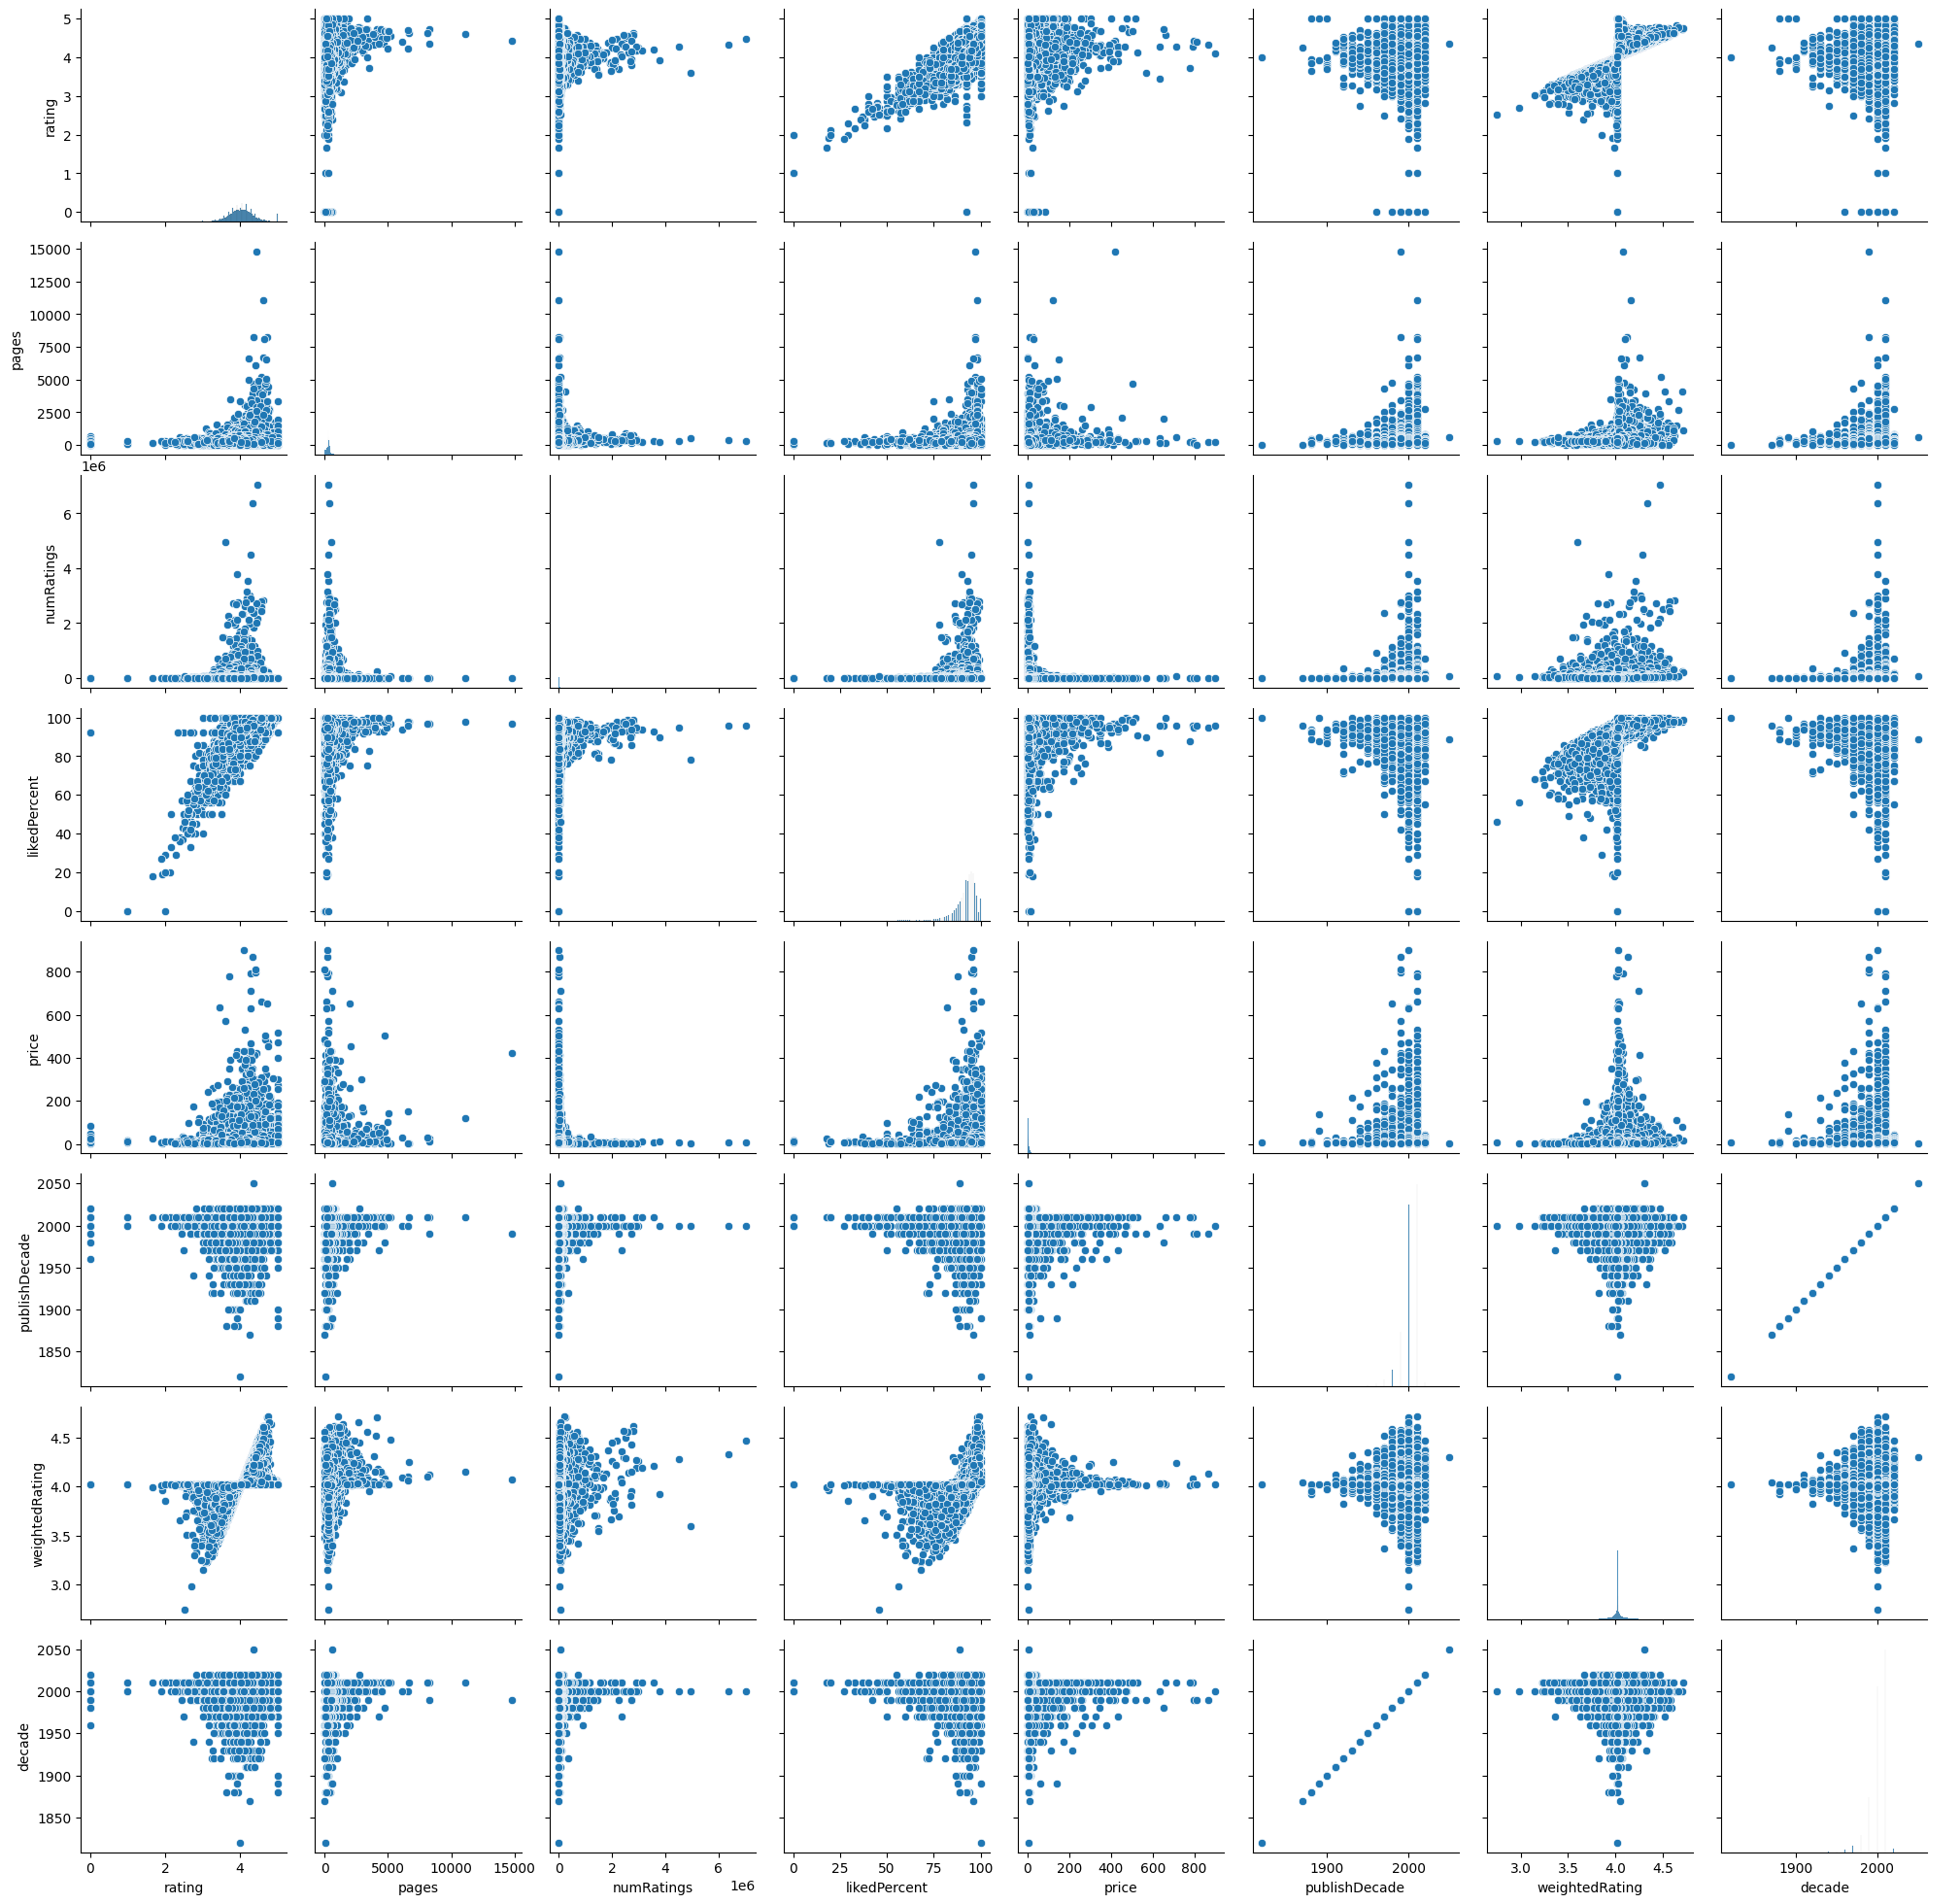

In [129]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

---

### Modelos

##### K-Means

me parecio interesante utilizar un modelo de clusters para poder visualizar mejor las relaciones entre los libros y poder ver si es posible crear un sistema de recomendaciones con la informacion que dispongo.

In [130]:
##### Feature engineering

# aplico frequency encoding en las columnas 'language' y 'bookFormat'
cols = ['language', 'bookFormat']
for col in cols:
    freq_encoder = df.groupby(col).size() / len(df)

    df[col + '_freq'] = df[col].apply(lambda x: freq_encoder[x])

# creo un dataframe 'aux' donde las columnas son los 15 generos mas populares y los indices los mismos que el dataframe 'df'
df.set_index('bookId', inplace=True)
aux = pd.DataFrame(columns=genres.value_counts()[:15].index, index=df.index)

# si el libro pertenece a uno de los 15 generos mas populares pongo un 1 en la columna correspondiente, sino un 0
for i in range(len(df)):

    lista = ast.literal_eval(df.iloc[i]['genres'])
    
    for j in lista:

        if j in aux.columns:
            aux[j].iloc[i] = 1

aux.fillna(0, inplace=True)

#combino ambos dataframes en uno llamado 'df_kmeans'
df_kmeans = df.merge(aux, how='outer', on=aux.index)

# aplico minmax scaling en la columna numRatings
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
array = df_kmeans['numRatings'].values.reshape(-1,1)
escalado = scaler.fit_transform(array)
df_kmeans['numRatingsStandard'] = escalado

In [131]:
from fcmeans import FCM
from sklearn.cluster import KMeans

In [137]:
X = df_kmeans.drop(columns=['title', 'author', 'language', 'genres', 'bookFormat', 'publishDate', 'firstPublishDate', 'rating', 'numRatings', 'key_0', 'decade'])

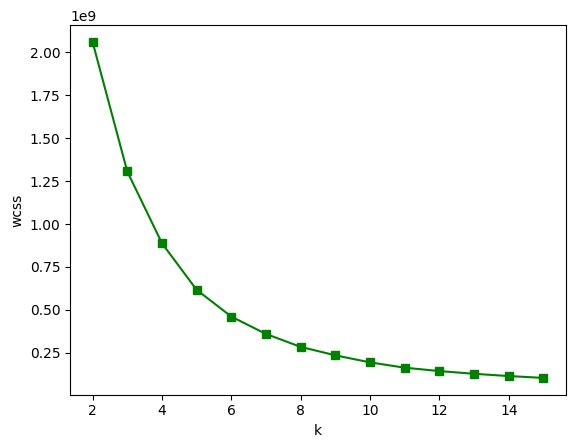

In [138]:
# veo cual es la cantidad ideal de clusters

limit = 15

wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [139]:
# luego de ver el grafico anterior me decidi por usar 5 clusters
data=X.values

fcm = FCM(n_clusters=5)
fcm.fit(data)

centers = fcm.centers
labels = fcm.predict(data)

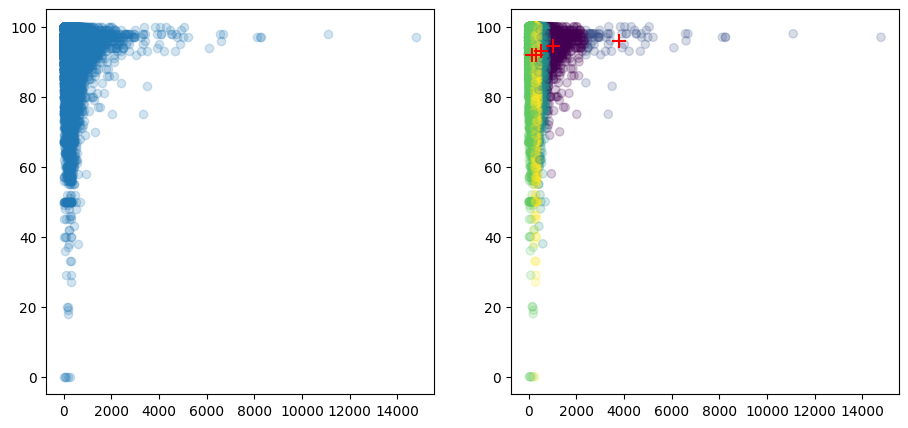

In [140]:
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1], alpha=0.2)
axes[1].scatter(data[:,0], data[:,1],c=labels ,alpha=0.2)
axes[1].scatter(centers[:,0], centers[:,1], marker='+', s=100, c='r')

#### Evaluando el modelo

In [143]:
from sklearn import metrics

silueta = metrics.silhouette_score(X, labels, metric='euclidean')
daviesbouldin = metrics.davies_bouldin_score(X, labels)

In [144]:
print(f'Coeficiente de silueta: {silueta}')
print(f'Indice de Davies-Bouldin: {daviesbouldin}')

Coeficiente de silueta: 0.5103387276957025
Indice de Davies-Bouldin: 0.5925417503749731


El coeficiente de silueta (metrics.silhouette_score) devuelve como resultado la media del coeficiente de silueta por cada sample utilizado en el modelo. Este resultado, esta limitado entre -1 para un clustering incorrecto y +1 para un cluster con alta densidad. Resultados al rededor de cero indican clusters que se superponen. Cuanto mas alto es este resultado, los clusters estan mejor separados, concordando asi con el concepto standard de cluster.

El indice de Davies-Bouldin (metrics.davies_bouldin_score) representa la similaridad promedio entre los clusters, donde la similaridad es una medida que compara la distancia entre clusters y el tamaño de estos.
Cero es el valor mas bajo posible, y los valores cercanos a cero indican una mejor particion.

Como se puede observar en el grafico y los resultados de los coeficientes recien mostrados, existen bastantes puntos de relacion entre los distintos libros del dataframe. Esto me da pie a buscar modelos donde pueda filtrar los libros segun estas relaciones y poder recomendarlos al usuario sin necesidad de adquirir nueva informacion.

---

### Content-Based Filtering

sistema que recomienda items al usuario basandose en las similaridades que estos tengan con un item particular usando metadata (el autor y los generos a los que el libro ingresado pertenezca en este caso)

In [37]:
# creo una copia del dataframe original
metadata = df.copy()

In [38]:
from ast import literal_eval

features = ['author', 'genres']

metadata['genres'] = metadata['genres'].apply(literal_eval)

In [39]:
# funcion que elimina los espacios, transforma a minuscula y en el caso de strings que contengan una coma, elimina todo el texto a partir de esta.
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", "").split(",")[0])
        else:
            return ''

In [40]:
# limpio las columnas 'author' y 'genres' con la funcion que acabo de crear
for feature in features:
    metadata[feature] = metadata[feature].apply(cleaner)

In [45]:
# funcion que devuelve un string concatenando las columnas 'author' y 'genres' del dataset utilizado con un espacio.
def make_soup(x):
    return ''.join(x['author']) + ' ' + ' '.join(x['genres'])

In [46]:
# guardo la informacion devuelta por la funcion 'make_soup' en la columna 'soup'
metadata['soup'] = metadata.apply(make_soup, axis=1)

In [47]:
#asi se ven estos resultados
metadata['soup'].head()

0    suzannecollins youngadult fiction dystopia fan...
1    j.k.rowling fantasy youngadult fiction magic c...
2    harperlee classics fiction historicalfiction s...
3    janeausten classics fiction romance historical...
4    stepheniemeyer youngadult fantasy romance vamp...
Name: soup, dtype: object

In [48]:
# creo un vector de relacion usando la columna recien creada
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata['soup'])

In [49]:
count_matrix.shape

(52429, 25175)

In [50]:
# uso la funcion cosine_similarity para calcular la similaridad entre los vectores de relacion
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(count_matrix, count_matrix)

In [52]:
# reinicio los indices del dataframe metadata y creo una serie con los titulos y id de cada libro para poder relacionar los resultados de las predicciones con dicho dataframe
metadata = metadata.reset_index()
indices = pd.Series(metadata.index, index=metadata['title'])

In [53]:
# creo una funcion que recibe un titulo como input y devuelve los 10 libros mas similares
def get_recommendations(title, cosine_sim=cos_sim):
    #encuentro el indice del titulo ingresado
    idx = indices[title]

    #busco los scores de similaridad con este libro
    sim_scores = list(enumerate(cosine_sim[idx]))

    #ordeno la lista de libros segun el score obtenido por cada uno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #devuelvo los 10 mas similares (salteo el 1ro ya que el libro ingresado es siempre el mas similar a si mismo)
    sim_scores = sim_scores[1:11]

    #busco los indices
    movie_indices = [i[0] for i in sim_scores]

    #devuelvo los titulos de los libros mas similares
    return metadata['title'].iloc[movie_indices]

A continuacion un par de ejemplos para demostrar el funcionamiento del modelo

In [56]:
get_recommendations('The Hunger Games')

221                        Catching Fire
184      The Hunger Games Trilogy Boxset
326                           Mockingjay
12765                     Graduation Day
17098                  Independent Study
21                             Divergent
151                            Insurgent
345                               Legend
1602                      Blood Red Road
4493                           Article 5
Name: title, dtype: object

In [60]:
get_recommendations('The Da Vinci Code')

456                                        The Lost Symbol
528                                        Angels & Demons
664                                                Inferno
5900     Angels and Demons / The Da Vinci Code (Robert ...
2226                                                Origin
731                                       Digital Fortress
873                                        Deception Point
8263                                        The Third Twin
17572                                             Whiteout
14134                                                Folly
Name: title, dtype: object

In [61]:
get_recommendations('Fahrenheit 451')

38                                         Brave New World
80                                                    1984
25843                                              Madwand
6                                              Animal Farm
300                                       The Time Machine
980                                     Animal Farm / 1984
1052           Brave New World / Brave New World Revisited
2434                                        The Chrysalids
4694     The Futurological Congress: From the Memoirs o...
14097               The Time Machine/The War of the Worlds
Name: title, dtype: object

este modelo me parece el ideal entre todos los que pude encontrar ya que hace buenas recomendaciones sin necesidad de ingresar una gran cantidad de libros y ademas no depende de las puntuaciones de otros usuarios para estas.

cabe destacar que se podria seguir puliendo el modelo haciendo cambios en las features utilizadas y se podrian mejorar aun mas los resultados obtenidos creando una funcion que permita al usuario ingresar mas de un libro y que dichos resultados se vean afectados segun el rating que asigne el usuario a cada uno de los libros ingresados.